<a href="https://colab.research.google.com/github/karloxkronfeld/covid19/blob/master/mas2m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pylab import *

In [ ]:
covid_colombia=pd.read_csv("https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD&bom=true&format=true")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,14,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
datos=covid_colombia.iloc[:,[0,1,4,6,7,9]]
datos.columns=["fecha","ID","departamento","municipio","edad","sexo"]

In [ ]:
bins = [0,10,20,30,40,50,60,70,80,100]
datos["Edades"]=pd.cut(datos.edad,bins)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


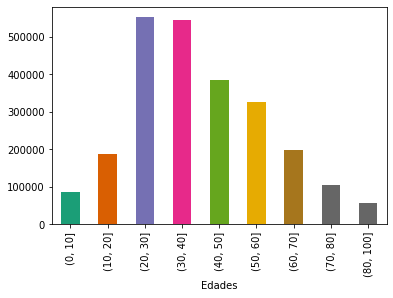

In [ ]:
datos.groupby(["Edades"])["fecha"].count().plot(kind="bar",color=cm.Dark2(arange(9)))

In [ ]:
por_edad=datos.groupby(["edad"])["fecha"].count()
max(por_edad)

61994

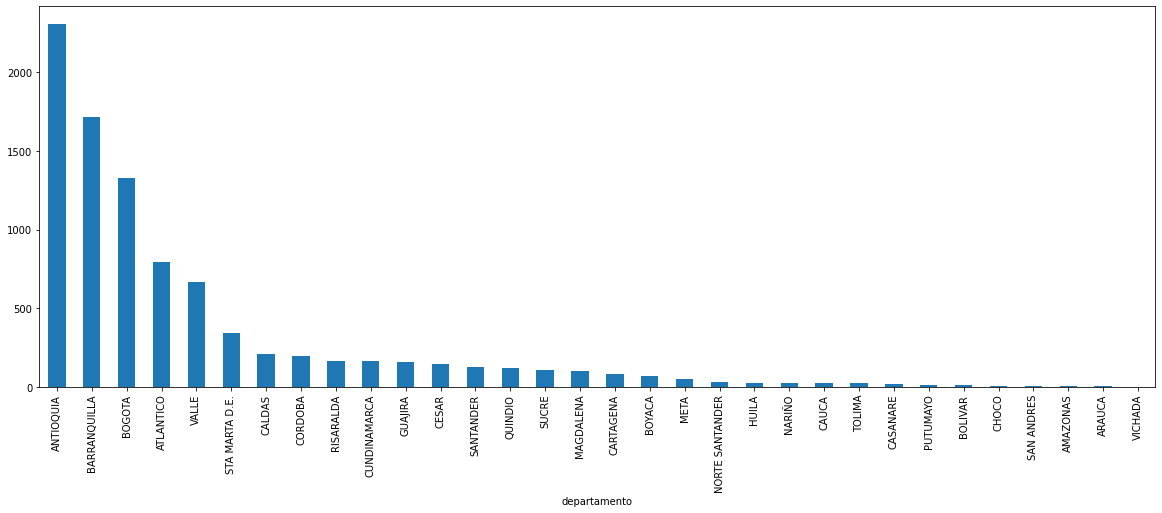

In [ ]:
undia=datos[datos.fecha=='4/4/2021 0:00:00']
undia.groupby(["departamento"])["fecha"].count().sort_values(ascending=False).plot(kind="bar",figsize=(20,7))


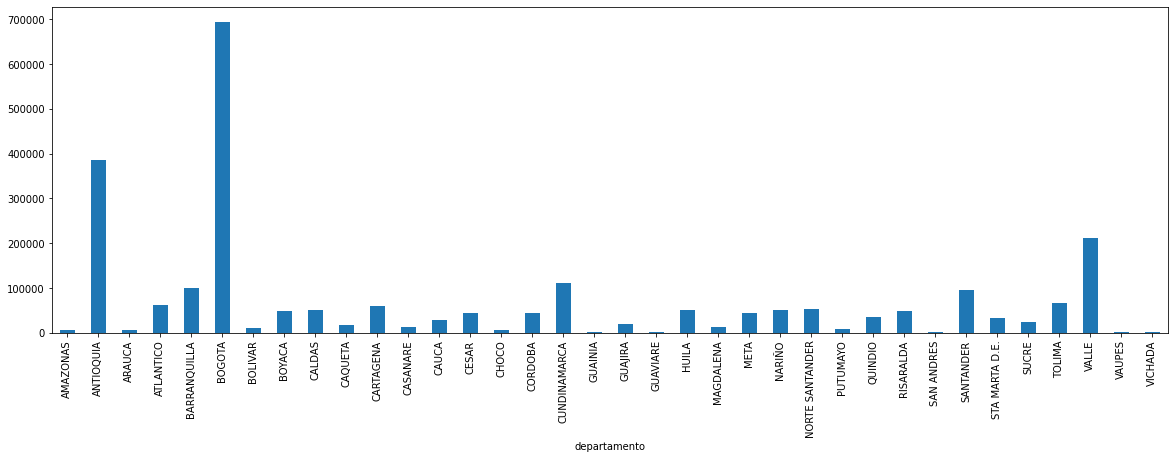

In [ ]:
datos.groupby(["departamento"])["fecha"].count().plot(kind="bar",figsize=(20,6))

Text(20, 61994, '61994\n29 Años')

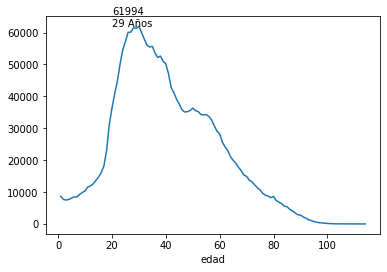

In [ ]:
por_edad.plot()
text(20,max(por_edad),"{}\n{} Años".format(max(por_edad),where(por_edad==max(por_edad))[0][0]))

In [ ]:
datos.groupby(["departamento"])["fecha"].count().reset_index(name="casos")

,departamento,casos
0,AMAZONAS,5874
1,ANTIOQUIA,384957
2,ARAUCA,5784
3,ATLANTICO,61146
4,BARRANQUILLA,100468
5,BOGOTA,693578
6,BOLIVAR,10704
7,BOYACA,48399
8,CALDAS,50340
9,CAQUETA,17205


In [ ]:
datos.edad

fecha
2020-06-03    19
2020-09-03    34
2020-09-03    50
2020-11-03    55
2020-11-03    25
              ..
2021-04-04    61
2021-04-04    18
2021-04-04    54
2021-04-04    12
2021-04-04    20
Name: edad, Length: 2446219, dtype: int64